**Project Outline**


1. **Problem Definition**: Predict customer churn (binary classification: Yes or No) based on customer features.
2. **Data Collection & Preprocessing**: Load the dataset, clean data, handle missing values, and encode categorical variables.
3. **Model Selection & Training**: Choose classification algorithms (e.g., Decision Trees, Random Forest) and train the model.
4. **Model Evaluation**: Evaluate using metrics like accuracy, precision, recall, and confusion matrix.
5. **Conclusion & Recommendations**: Summarize insights and suggest actions to reduce churn based on model results.


**Problem Statement:**

Customer churn is a major concern for companies, as losing customers directly impacts revenue. This project aims to predict customer churn using machine learning, based on customer data such as demographics, account information, and usage patterns, helping businesses identify at-risk customers and take preventive actions.

**Question**:
How can we predict customer churn using machine learning?

**Answer**:
Customer churn can be predicted by training a machine learning model on customer data such as demographics, usage patterns, and account details. The model can then classify customers as likely to churn or not, helping companies take proactive measures to retain customers.

using "WA_Fn-UseC_-Telco-Customer-Churn.csv" dataset we see the execution of **AI-ML binary classification problem, typical in supervised learning.**


In [17]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.shape


(7043, 21)

Dataset having **7043 rows and 21 columns**

**Step 1: Setup & Load Data**

In [2]:
# Step 1: Install and Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 2: Load the Dataset
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Step 2: Data Preprocessing**

In [3]:
# Step 3: Check for missing values
df.replace(" ", np.nan, inplace=True)
df.isnull().sum()

# Step 4: Drop rows with missing values
df.dropna(inplace=True)

# Step 5: Drop customerID (not useful for prediction)
df.drop('customerID', axis=1, inplace=True)

# Step 6: Convert 'TotalCharges' to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

# Step 7: Encode categorical variables
le = LabelEncoder()
for column in df.select_dtypes(include='object').columns:
    df[column] = le.fit_transform(df[column])

df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


**Step 3: Train-Test Split**

In [4]:
# Step 8: Split dataset
X = df.drop('Churn', axis=1)  # Features
y = df['Churn']               # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Step 4: Model Building**

In [5]:
# Step 9: Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 10: Predictions
y_pred = model.predict(X_test)


**Step 5: Evaluation**

Accuracy Score: 0.7924662402274343

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



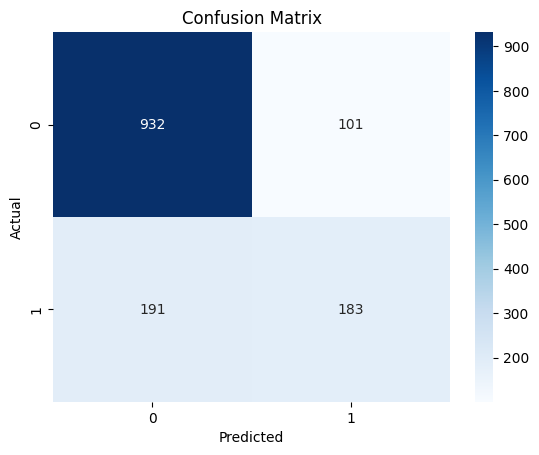

In [6]:
# Step 11: Model Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 12: Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Monthly Charges**

A Monthly Charges graph typically displays the distribution of monthly payment amounts across all customers. Here's how you can interpret it:

Histogram/Distribution Plot: A histogram or a box plot of Monthly Charges can show how the charges are spread out.

If most customers have lower charges, you might see a peak at the lower end.

If there’s a significant spread, you could have a wider range of values.

Outliers might indicate customers who are paying significantly higher charges, potentially for premium plans or additional services.

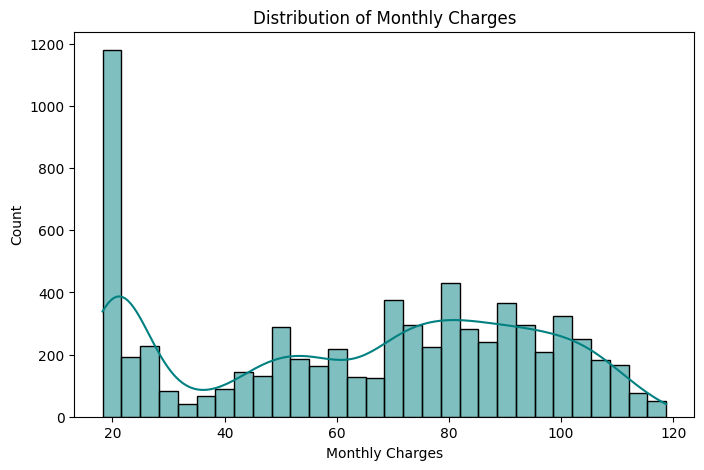

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Monthly Charges
plt.figure(figsize=(8, 5))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True, color='teal')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.show()


**Tenure (How long they've been a customer)**

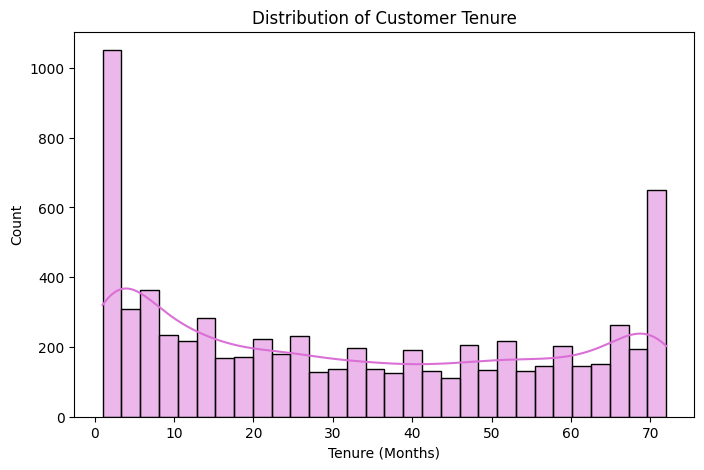

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(df['tenure'], bins=30, kde=True, color='orchid')
plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.show()


**Tenure vs Monthly Charges**

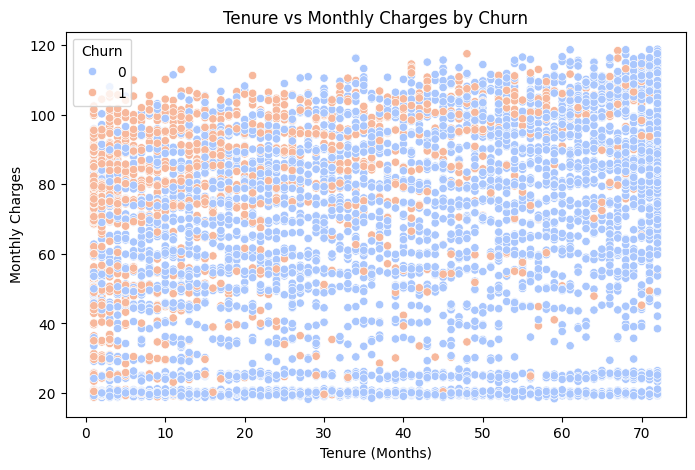

In [10]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', palette='coolwarm')
plt.title('Tenure vs Monthly Charges by Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Monthly Charges')
plt.show()


**Total Charges vs Monthly Charges**

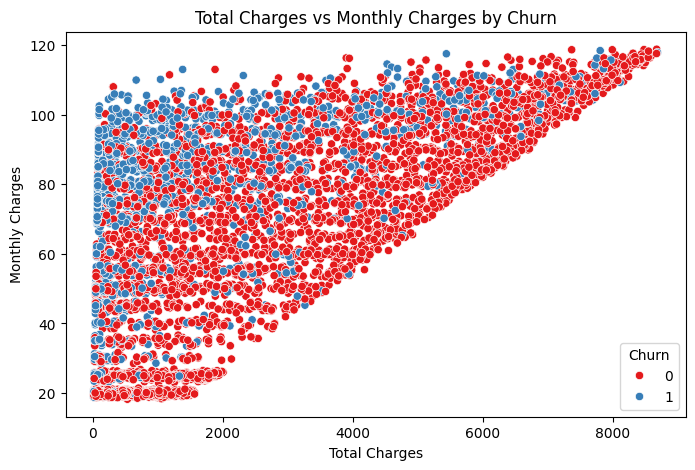

In [11]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='TotalCharges', y='MonthlyCharges', hue='Churn', palette='Set1')
plt.title('Total Charges vs Monthly Charges by Churn')
plt.xlabel('Total Charges')
plt.ylabel('Monthly Charges')
plt.show()


**Countplot for Binary Columns**

A **countplot** for binary columns shows the distribution of two possible values (e.g., Yes/No, 0/1) in a dataset. For example, in the Telco Customer Churn dataset, columns like `Churn`, `SeniorCitizen`, or `Partner` might be binary, where:

* **X-axis**: Represents the binary categories (e.g., 'Yes' and 'No' for `Churn`, '0' and '1' for `SeniorCitizen`).
* **Y-axis**: Represents the count (frequency) of occurrences for each binary category.

### Explanation:

* **Churn (Yes/No)**: A countplot would show how many customers are likely to churn versus those who are not.
* **SeniorCitizen (0/1)**: This countplot would show how many customers are senior citizens versus those who are not.

The countplot helps in quickly visualizing the balance or imbalance of categories in a binary column, which is important for understanding the data and deciding on strategies like resampling for machine learning models.


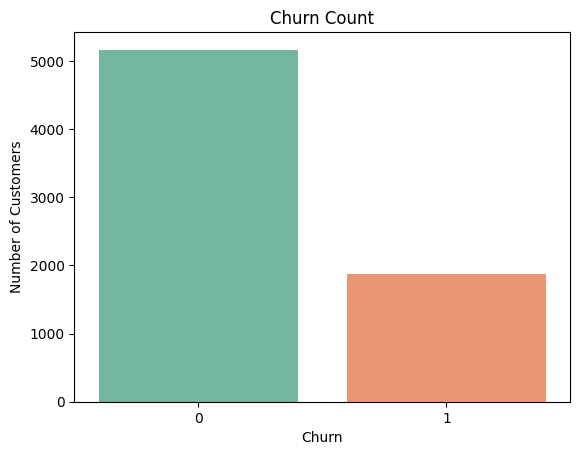

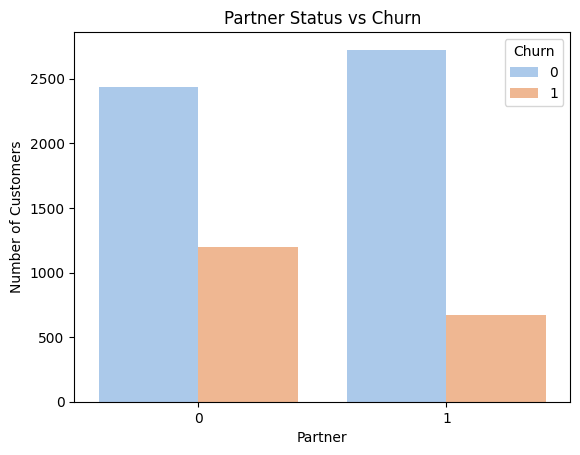

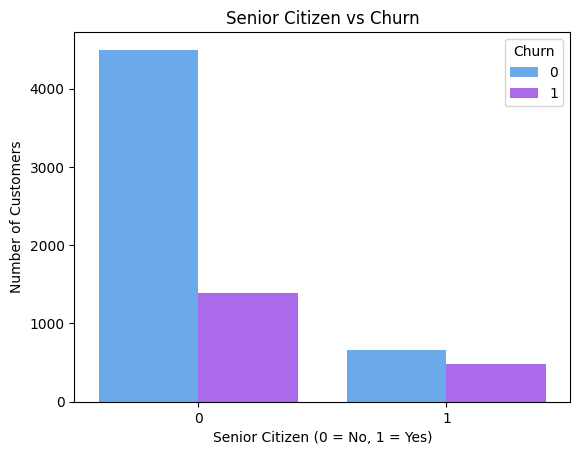

In [12]:
# Churn Distribution
sns.countplot(data=df, x='Churn', hue='Churn', palette='Set2', legend=False)
plt.title('Churn Count')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

# Partner vs Churn
sns.countplot(data=df, x='Partner', hue='Churn', palette='pastel')
plt.title('Partner Status vs Churn')
plt.xlabel('Partner')
plt.ylabel('Number of Customers')
plt.show()

# Senior Citizen vs Churn
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', palette='cool')
plt.title('Senior Citizen vs Churn')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.show()



**Churn Prediction Counts**

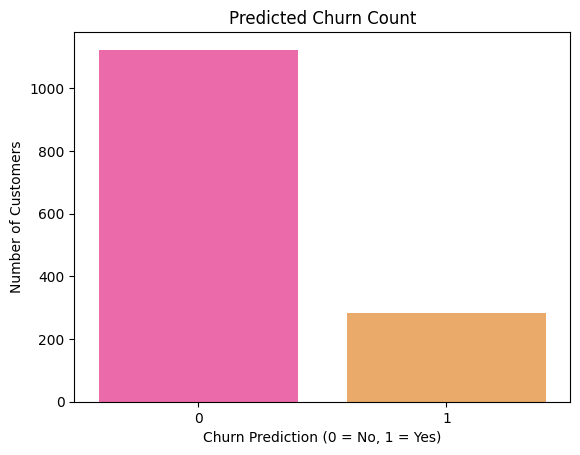

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert predictions to DataFrame for easier plotting
pred_df = pd.DataFrame({'Prediction': y_pred})

# Plot using hue with same variable, no legend needed
sns.countplot(data=pred_df, x='Prediction', hue='Prediction', palette='spring', legend=False)
plt.title('Predicted Churn Count')
plt.xlabel('Churn Prediction (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.show()


**Actual vs Predicted**

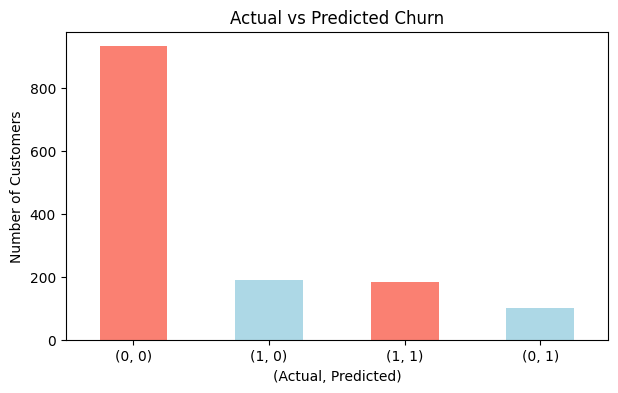

In [14]:
import pandas as pd

# Create a comparison DataFrame
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Count plot grouped
results_df.value_counts().plot(kind='bar', color=['salmon', 'lightblue'], figsize=(7, 4))
plt.title('Actual vs Predicted Churn')
plt.xlabel('(Actual, Predicted)')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()


**Comparing Predictions**

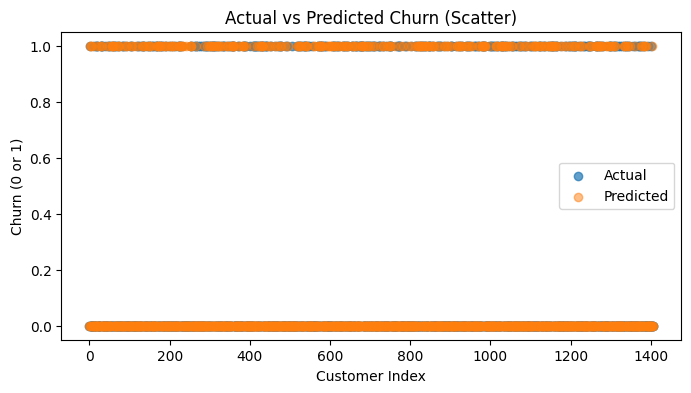

In [15]:
plt.figure(figsize=(8, 4))
plt.scatter(range(len(y_test)), y_test, label='Actual', alpha=0.7)
plt.scatter(range(len(y_pred)), y_pred, label='Predicted', alpha=0.5)
plt.title('Actual vs Predicted Churn (Scatter)')
plt.xlabel('Customer Index')
plt.ylabel('Churn (0 or 1)')
plt.legend()
plt.show()


**Final Result(Evaluation & Plots)**

Model Accuracy: 0.7924662402274343

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



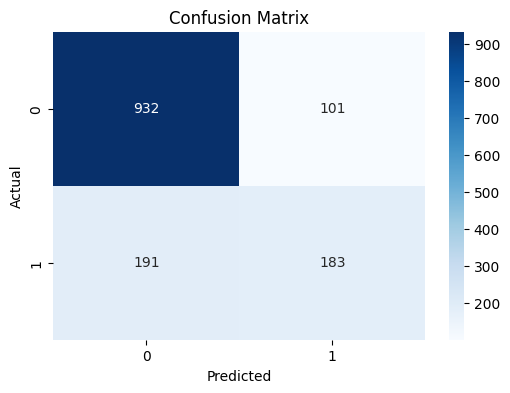

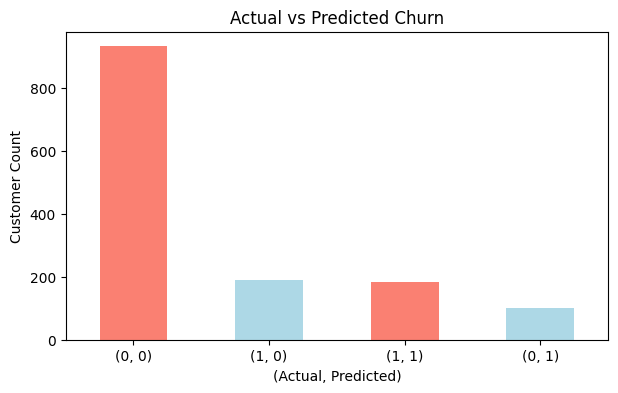

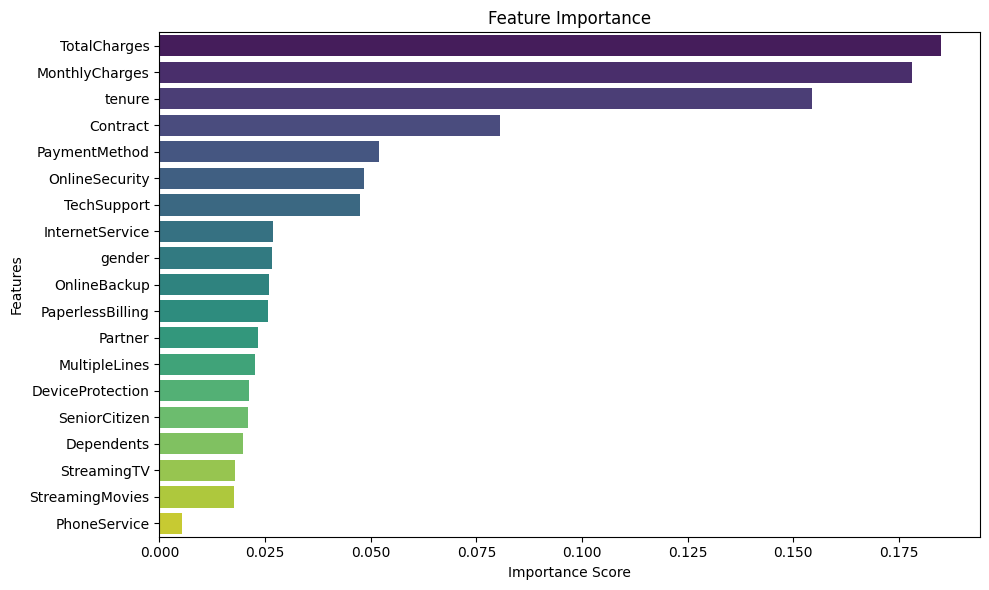

In [23]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Accuracy & Classification Report
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# 2. Confusion Matrix
plt.figure(figsize=(6, 4))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 3. Actual vs Predicted Count Plot
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.value_counts().plot(kind='bar', color=['salmon', 'lightblue'], figsize=(7, 4))
plt.title('Actual vs Predicted Churn')
plt.xlabel('(Actual, Predicted)')
plt.ylabel('Customer Count')
plt.xticks(rotation=0)
plt.show()

# 4.Prepare Feature Importance DataFrame
importances = model.feature_importances_
features = X.columns
feat_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 5.Feature Importance Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=feat_df,
    x='Importance',
    y='Feature',
    hue='Feature',        # Assign hue
    dodge=False,          # Avoid split bars
    palette='viridis',
    legend=False          # Disable legend since hue = y
)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()



